In [58]:
library(coda)
library(rstan)
library(rjags)

# EX 1

Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number  of deaths by horse kick among the Prussian army follows the Poisson distribution.

Considering the following two sets of observations taken over a fixed large time interval in two different corps:

- death soldiers: 0 1 2 3 4 ≥ 5
- n1 observations: 109 65 22 3 1 0
- n2 observations: 144 91 32 11 2 0

assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

In [59]:
obs1 <- c(rep(0,109), rep(1,65), rep(2,22), rep(3,3), rep(4,1))
obs2 <- c(rep(0,144), rep(1,91), rep(2,32), rep(3,11), rep(4,2))
obstot <- c(obs1, obs2)
prior <- 1

# values for gamma 
alpha1 <- sum(obs1) + 1
lam1 <- length(obs1) 
alpha2 <- sum(obs2) + 1
lam2 <- length(obs2) 
alphatot <- sum(obstot) + 1
lamtot <- length(obstot) 

mu <- seq(0.1,4,0.001)

death_rate <- dgamma(mu, alphatot, lamtot)
dist_mean <- sum(mu*death_rate)*0.001
dist_var <- sum((dist_mean-mu)^2 * death_rate)*0.001


low <- (cumsum(death_rate*0.001)<0.025)
up <- (cumsum(death_rate*0.001)>0.975)
lower_bound <- tail(mu[low],1)
upper_bound <- head(mu[up],1)


95% Credibility Interval: [ 0.593 ,  0.739 ]


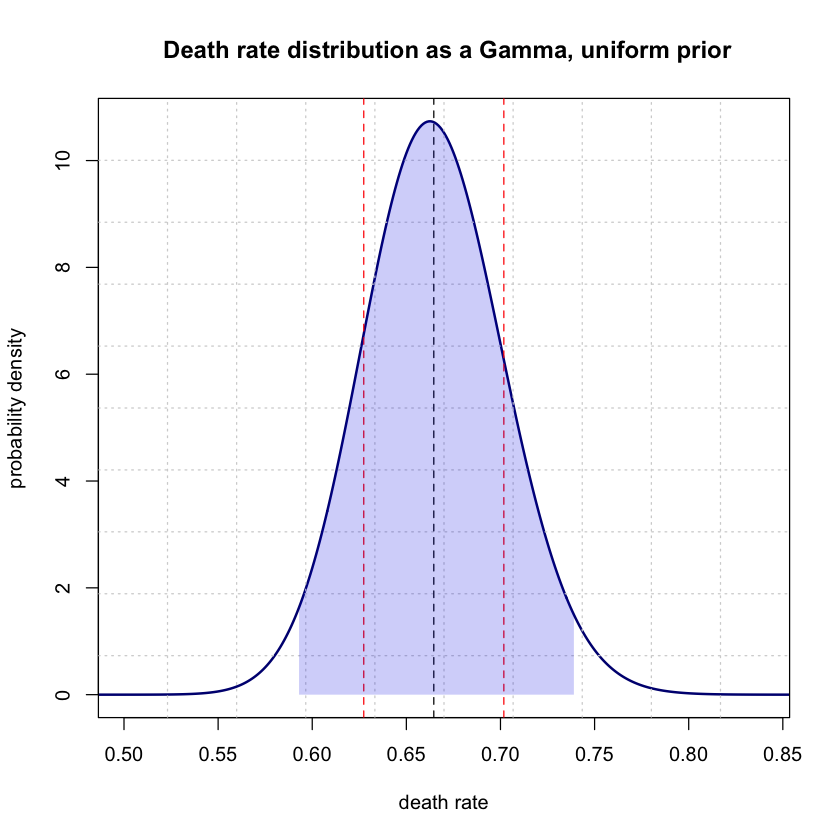

In [60]:
plot(mu, death_rate,
    xlim = c(0.5,0.84),
    type = 'l',
    lwd = 2,
    xlab = 'death rate',
    ylab = 'probability density',
    main = ' Death rate distribution as a Gamma, uniform prior',
    col = 'navy')
grid(nx = 10, ny = 10, col = "lightgray", lty = "dotted")
abline(v = dist_mean, lty = 2)
abline(v = dist_mean + sqrt(dist_var), lty = 2, col = 'red')
abline(v = dist_mean - sqrt(dist_var), lty = 2, col = 'red')
polygon(c(mu[mu >= lower_bound & mu <= upper_bound], rev(mu[mu >= lower_bound & mu <= upper_bound])),
        c(death_rate[mu >= lower_bound & mu <= upper_bound], rep(0, length(death_rate[mu >= lower_bound & mu <= upper_bound]))),
        col = rgb(0., 0., 0.9,0.2), border = NA)

cat("95% Credibility Interval: [", lower_bound, ", ", upper_bound, "]\n")


assuming now a Jeffreys’ prior $ g(\lambda) \propto \frac{1}{\sqrt{\lambda}}$, compute and plot the posterior distribution for λ, the death rate over the measurement time.   
  
 Determine the posterior mean, median and variance, and compute the 95% credibility interval.

95% Credibility Interval: [ 0.592 ,  0.738 ]


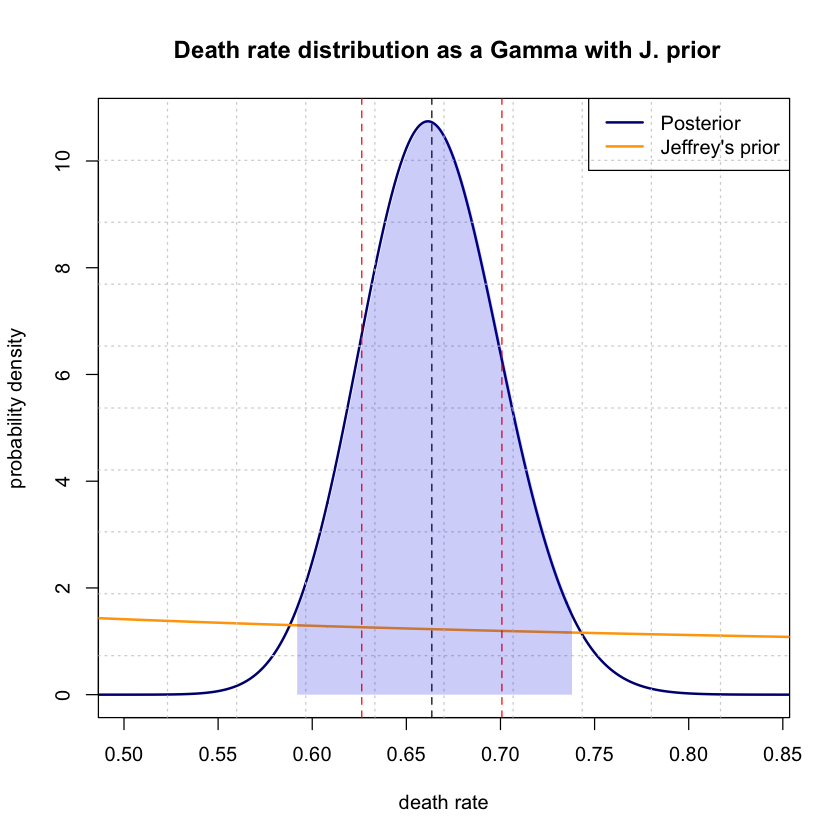

In [61]:
j_prior <- 1/sqrt(mu)
post <- j_prior * death_rate
norm_fact <- sum(post*0.001)
post <- post / norm_fact

dist_mean <- sum(mu*post)*0.001
dist_var <- sum((dist_mean-mu)^2 * death_rate)*0.001

low <- (cumsum(post*0.001)<0.025)
up <- (cumsum(post*0.001)>0.975)
lower_bound <- tail(mu[low],1)
upper_bound <- head(mu[up],1)

plot(mu, post,
    xlim = c(0.5,0.84),
    type = 'l',
    lwd = 2,
    xlab = 'death rate',
    ylab = 'probability density',
    main = ' Death rate distribution as a Gamma with J. prior',
    col = 'navy')
lines(mu, j_prior,
    type = 'l',
    lwd = 2,
    col = 'orange')
grid(nx = 10, ny = 10, col = "lightgray", lty = "dotted")
abline(v = dist_mean, lty = 2)
abline(v = dist_mean + sqrt(dist_var), lty = 2, col = 'red')
abline(v = dist_mean - sqrt(dist_var), lty = 2, col = 'red')
polygon(c(mu[mu >= lower_bound & mu <= upper_bound], rev(mu[mu >= lower_bound & mu <= upper_bound])),
        c(death_rate[mu >= lower_bound & mu <= upper_bound], rep(0, length(death_rate[mu >= lower_bound & mu <= upper_bound]))),
        col = rgb(0., 0., 0.9,0.2), border = NA)
legend('topright', legend = c('Posterior', 'Jeffrey\'s prior' ), col = c('navy', 'orange'), lty = c(1,1), lwd = c(2,2))
cat("95% Credibility Interval: [", lower_bound, ", ", upper_bound, "]\n")

# EX 2

solve Exercise 1 using a Markov Chain Monte Carlo using 'stan'.


SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 1001 / 10000 [ 10%]  (Sampling)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Sampling)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Sampling)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Sampling)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.015 seconds (Warm-up)
Chain 1:                0.152 seconds (Sampling)
Chain 1

Inference for Stan model: anon_model.
3 chains, each with iter=10000; warmup=1000; thin=1; 
post-warmup draws per chain=9000, total post-warmup draws=27000.

          mean se_mean   sd    2.5%     25%     50%     75%   97.5% n_eff Rhat
lambda    0.66    0.00 0.04    0.59    0.64    0.66    0.69    0.74 10564    1
lp__   -449.83    0.01 0.69 -451.82 -449.99 -449.56 -449.39 -449.34 12814    1

Samples were drawn using NUTS(diag_e) at Fri Jun  7 16:16:29 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

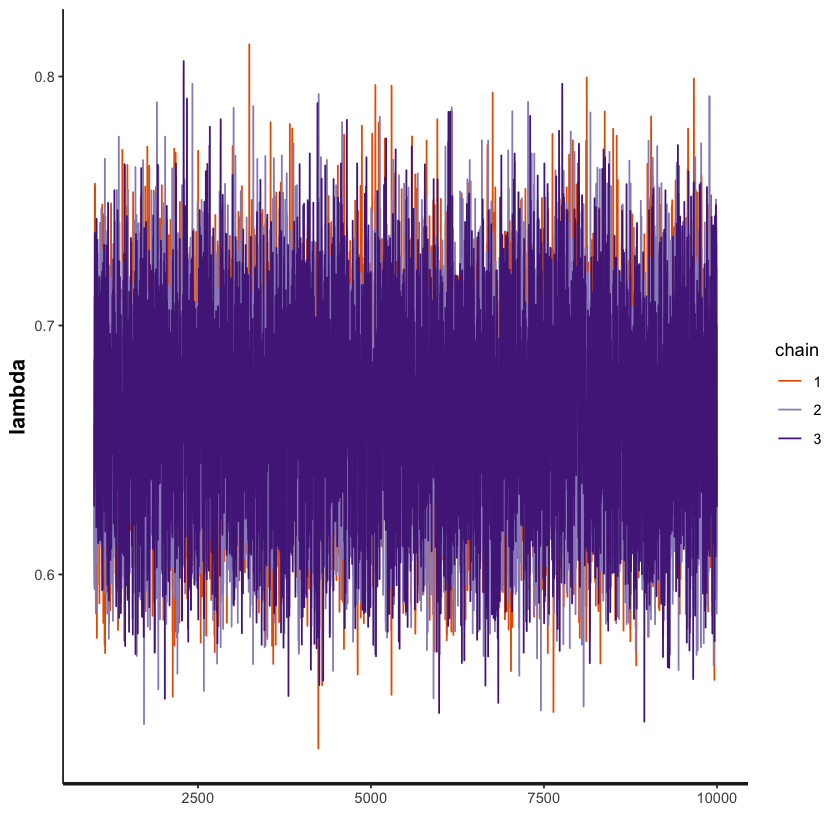

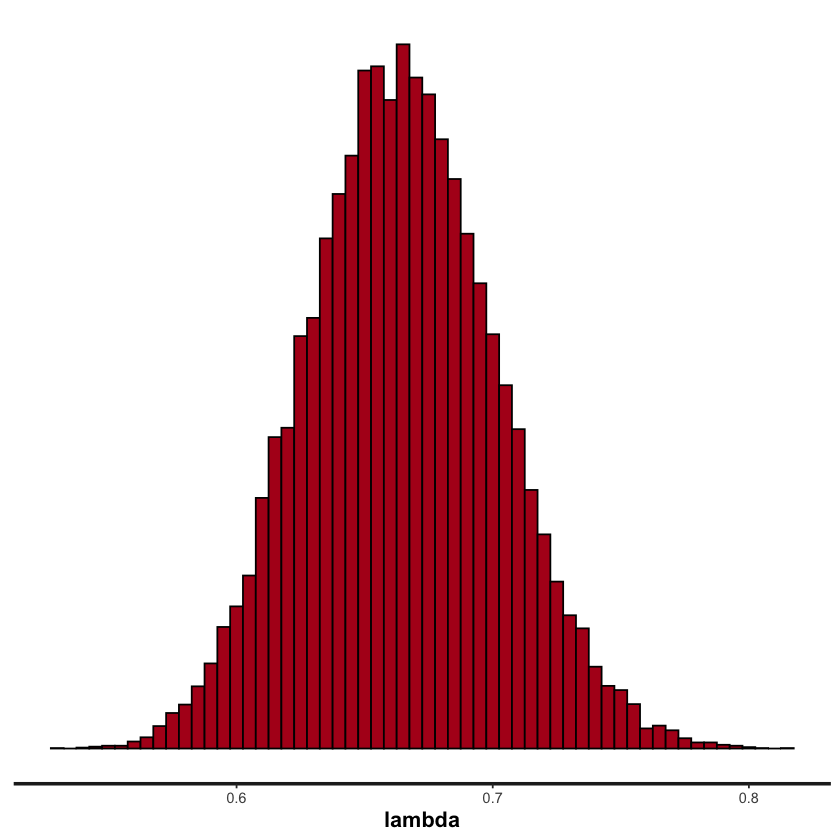

In [62]:
stan_unif <- stan_model(file = 'pois_unif.stan')
y <- obstot
N <- length(y)

dataList <- list(y = y , N = N)

stanFit <- sampling(object = stan_unif,
                    data = dataList, 
                    chains = 3, 
                    iter = 10000, 
                    warmup = 1000, 
                    thin = 1)
stanFit

stan_trace(stanFit)   
stan_hist(stanFit, binwidth = 0.005 )      

# EX 3

- A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.
- indicating with p the probability that a sample of water taken from the stream has a high bacter X level,

find the frequentist estimator for p

In [63]:
n_ex <- 116
y <- 11

p_freq <- round(y/n_ex, 3)
var_freq <- p_freq*(1-p_freq)/n_ex

cat('p in frequentist approach:', p_freq, '+/-', round(sqrt(var_freq),3))

p in frequentist approach: 0.095 +/- 0.027

using a Beta(1, 10) prior for p, calculate and posterior distribution P (p y), find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval



expected probability: 0.094 
95% credibility interval: [ 0.05 , 0.151 ]

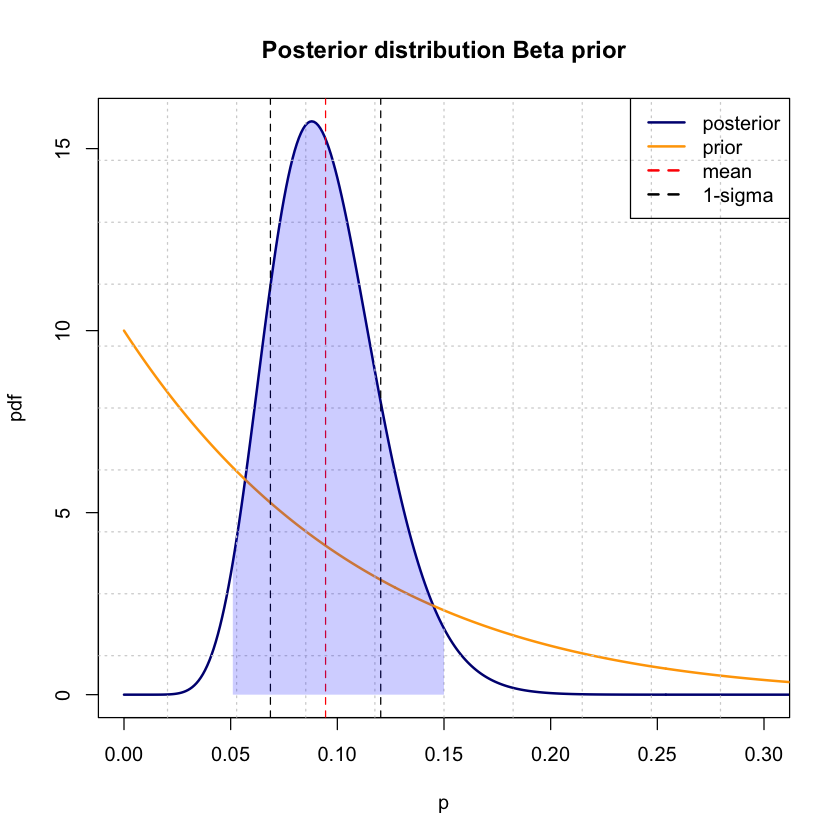

In [64]:
# Bayesian approach
p = seq(0,1,0.001)

prior <- dbeta(p, 1,10)

# conjugated priors
alpha <- 1 + y
beta <- 10 + n_ex - y
post <- dbeta(p, alpha, beta)
norm <- sum(post*0.001)


dist_mean <- alpha / (alpha + beta)
dist_var <-  (alpha * beta) / ((alpha + beta)^2 * (alpha + beta + 1))


lower_bound <- qbeta(0.025, alpha, beta)
upper_bound <- qbeta(0.975, alpha, beta)


plot(p, post,
     xlim = c(0,0.3),
     type = 'l',
     lwd = 2,
     col = 'navy', 
     main = 'Posterior distribution Beta prior',
     ylab = 'pdf')

lines(p, prior,
      type = 'l',
      lwd = 2,
      col = 'orange')

grid(nx = 10, ny = 10 )
abline(v = dist_mean, col = 'red', lty = 2)
abline(v = dist_mean-sqrt(dist_var), col = 'black', lty = 2)
abline(v = dist_mean+sqrt(dist_var), col = 'black', lty = 2)
legend('topright', legend = c('posterior', 'prior', 'mean', '1-sigma'), lty = c(1, 1,2,2), lwd = c(2,2,2,2),  col = c('navy', 'orange', 'red', 'black'))
polygon(x = c(p[p >= lower_bound & p <= upper_bound], rev(p[p >= lower_bound & p <= upper_bound])), # 
        y = c(post[p >= lower_bound & p <= upper_bound], rep(0, length(post[p >= lower_bound & p <= upper_bound]))), 
        col = rgb(0, 0, 1, 0.2), border = NA)

cat('expected probability:', round(dist_mean,3), '\n')
cat('95% credibility interval: [', round(lower_bound,3) ,',', round(upper_bound,3), ']' )

old_prior <- post


test the hypotesis, at 5% level of significance with both the frequentist and bayesian approach

- $H_0 : p=0.1$ ,  $H_1 : p \neq 0.1$ 

In [65]:
binom.test(x=y, n=n_ex, p=0.1)
cat('p-value > alpha, we accept H_0')


	Exact binomial test

data:  y and n_ex
number of successes = 11, number of trials = 116, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.04829409 0.16333954
sample estimates:
probability of success 
            0.09482759 


p-value > alpha, we accept H_0

95% credibility interval: [ 0.05 , 0.151 ]
p_0 = 0.1
H_0 accepted

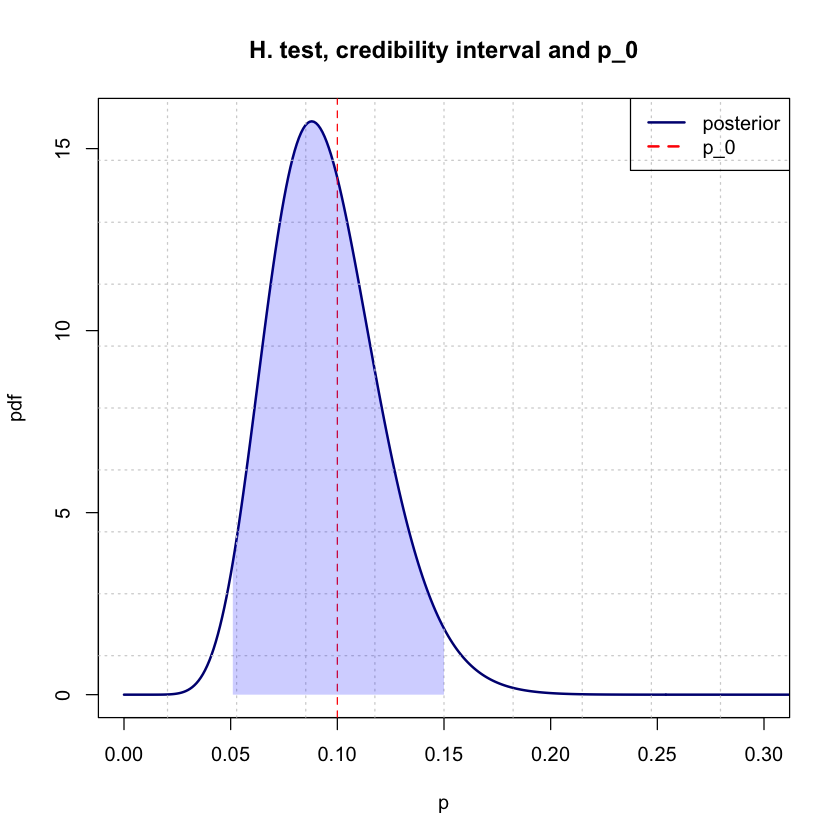

In [66]:
# Hypotesis test Bayesian approach 

plot(p, post,
     xlim = c(0,0.3),
     type = 'l',
     lwd = 2,
     col = 'navy', 
     main = 'H. test, credibility interval and p_0',
     ylab = 'pdf')

grid(nx = 10, ny = 10 )
abline(v = 0.1, col = 'red', lty = 2)
legend('topright', legend = c('posterior', 'p_0'), lty = c(1,2), lwd = c(2,2,2,2),  col = c('navy', 'red'))
polygon(x = c(p[p >= lower_bound & p <= upper_bound], rev(p[p >= lower_bound & p <= upper_bound])), # 
        y = c(post[p >= lower_bound & p <= upper_bound], rep(0, length(post[p >= lower_bound & p <= upper_bound]))), 
        col = rgb(0, 0, 1, 0.2), border = NA)

cat('95% credibility interval: [', round(lower_bound,3) ,',', round(upper_bound,3), ']\n' )
cat('p_0 = 0.1\n')
cat('H_0 accepted')

In [67]:
new_y <- 9
new_n <- 165

new_freq_p <- new_y/new_n
var_freq <- new_freq_p*(1-new_freq_p)/new_n

cat('p in frequentist approach:', round(new_freq_p,3), '+/-', round(sqrt(var_freq),3))

p in frequentist approach: 0.055 +/- 0.018

expected probability: 0.057 


95% credibility interval: [ 0.028 , 0.095 ]

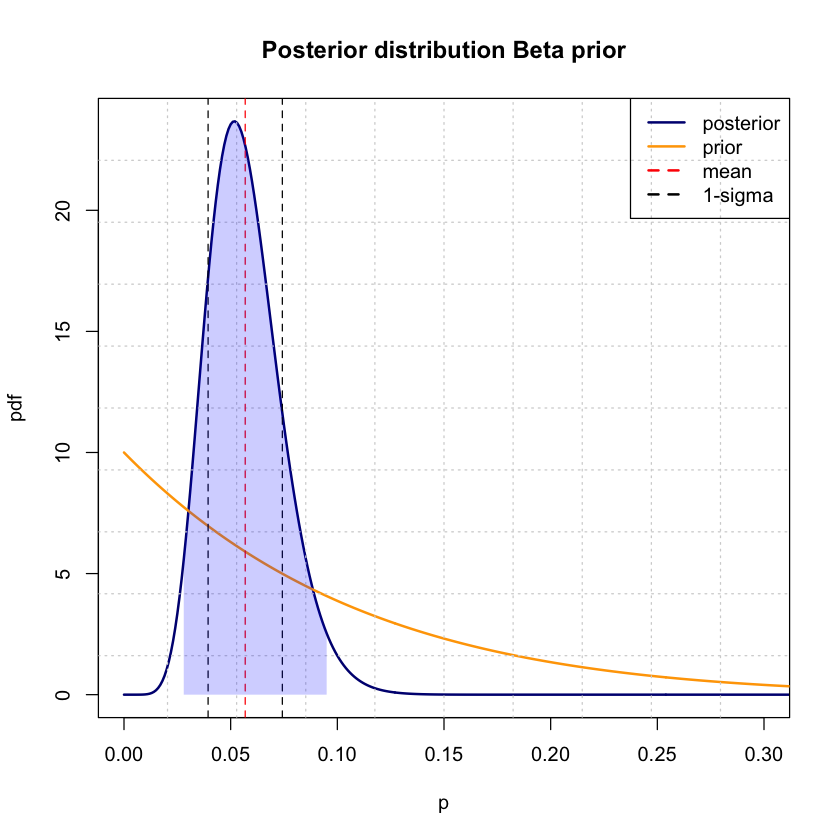

In [68]:
# Bayesian approach
p = seq(0,1,0.001)

prior <- dbeta(p, 1,10)

# conjugated priors
alpha <- 1 + new_y
beta <- 10 + new_n - new_y
post <- dbeta(p, alpha, beta)

dist_mean <- alpha / (alpha + beta)
dist_var <-  (alpha * beta) / ((alpha + beta)^2 * (alpha + beta + 1))

lower_bound <- qbeta(0.025, alpha, beta)
upper_bound <- qbeta(0.975, alpha, beta)

plot(p, post,
     xlim = c(0,0.3),
     type = 'l',
     lwd = 2,
     col = 'navy', 
     main = 'Posterior distribution Beta prior',
     ylab = 'pdf')

lines(p, prior,
      type = 'l',
      lwd = 2,
      col = 'orange')

grid(nx = 10, ny = 10 )
abline(v = dist_mean, col = 'red', lty = 2)
abline(v = dist_mean-sqrt(dist_var), col = 'black', lty = 2)
abline(v = dist_mean+sqrt(dist_var), col = 'black', lty = 2)
legend('topright', legend = c('posterior', 'prior', 'mean', '1-sigma'), lty = c(1, 1,2,2), lwd = c(2,2,2,2),  col = c('navy', 'orange', 'red', 'black'))
polygon(x = c(p[p >= lower_bound & p <= upper_bound], rev(p[p >= lower_bound & p <= upper_bound])), # 
        y = c(post[p >= lower_bound & p <= upper_bound], rep(0, length(post[p >= lower_bound & p <= upper_bound]))), 
        col = rgb(0, 0, 1, 0.2), border = NA)

cat('expected probability:', round(dist_mean,3), '\n')
cat('95% credibility interval: [', round(lower_bound,3) ,',', round(upper_bound,3), ']' )



	Exact binomial test

data:  new_y and new_n
number of successes = 9, number of trials = 165, p-value = 0.05112
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.02524192 0.10101679
sample estimates:
probability of success 
            0.05454545 


-----------------------------------------
FREQ: p-value > alpha, H_0 is accepted
-----------------------------------------
BAY: p=0.1 not in acceptancies area, H_0 is refused95% credibility interval: [ 0.028 , 0.095 ]


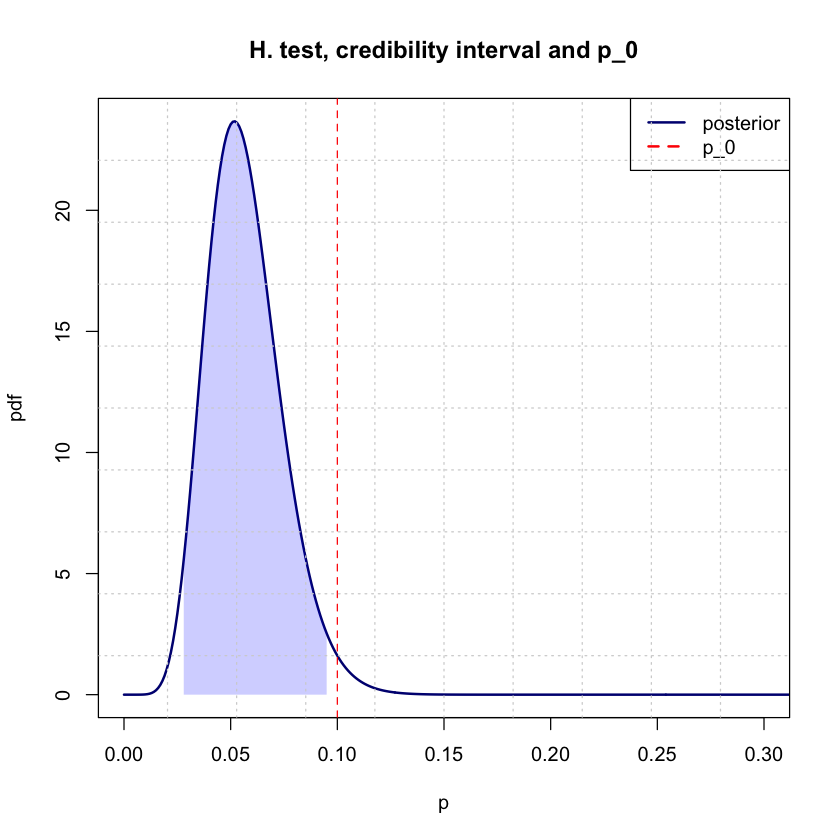

In [69]:
# hypotesis test 
binom.test(x=new_y, n=new_n, p=0.1)
cat('-----------------------------------------\n')
cat('FREQ: p-value > alpha, H_0 is accepted\n')
cat('-----------------------------------------\n')
cat('BAY: p=0.1 not in acceptancies area, H_0 is refused')

plot(p, post,
     xlim = c(0,0.3),
     type = 'l',
     lwd = 2,
     col = 'navy', 
     main = 'H. test, credibility interval and p_0',
     ylab = 'pdf')

abline(v = 0.1, lty = 2, lwd = 1, col = 'red')

legend('topright', legend = c('posterior', 'p_0'), lty = c(1,2), lwd = c(2,2,2,2),  col = c('navy', 'red'))
polygon(x = c(p[p >= lower_bound & p <= upper_bound], rev(p[p >= lower_bound & p <= upper_bound])), # 
        y = c(post[p >= lower_bound & p <= upper_bound], rep(0, length(post[p >= lower_bound & p <= upper_bound]))), 
        col = rgb(0, 0, 1, 0.2), border = NA)
grid(nx = 10, ny = 10 )
cat('95% credibility interval: [', round(lower_bound,3) ,',', round(upper_bound,3), ']\n' )


expected probability: 0.072 
95% credibility interval: [ 0.045 , 0.104 ]

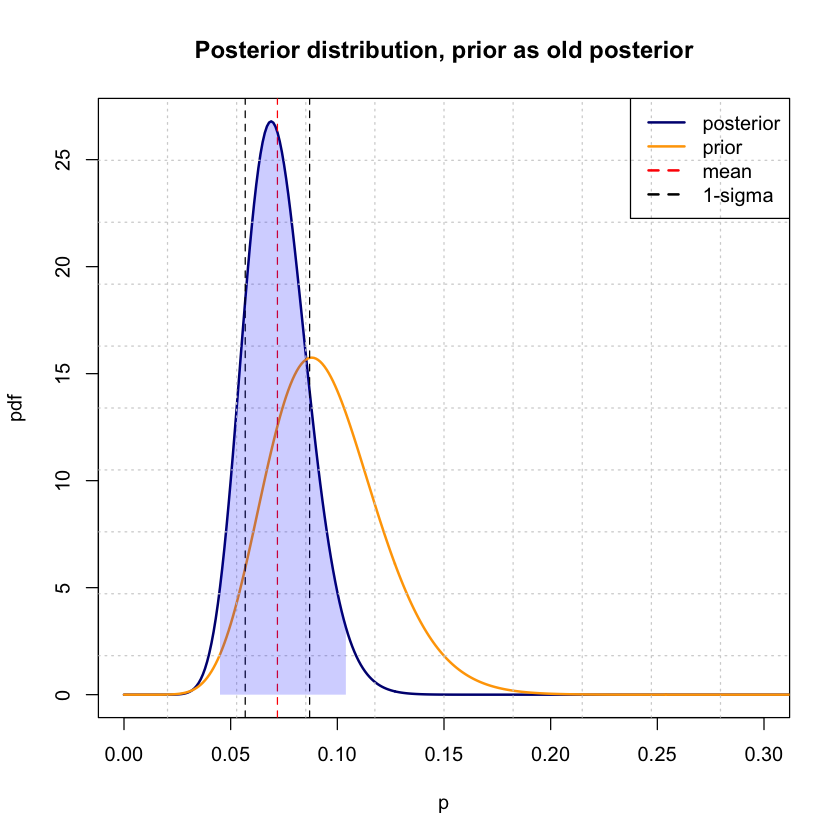

In [70]:
# Bayesian approach
prior <- old_prior

# post 
lik <- dbinom(x = new_y, size = new_n, prob = p)
post <- prior*lik
norm <- sum(post*0.001)
post <- post/norm

dist_mean <- sum(p*post*0.001)
dist_var <- sum((dist_mean-p)^2 * post)*0.001

lower_bound <- p[cumsum(post*0.001) > 0.025][1]
upper_bound <- p[cumsum(post*0.001) > 0.975][1]


plot(p, post,
     xlim = c(0,0.3),
     type = 'l',
     lwd = 2,
     col = 'navy', 
     main = 'Posterior distribution, prior as old posterior',
     ylab = 'pdf')

lines(p, prior,
      type = 'l',
      lwd = 2,
      col = 'orange')

grid(nx = 10, ny = 10 )
abline(v = dist_mean, col = 'red', lty = 2)
abline(v = dist_mean-sqrt(dist_var), col = 'black', lty = 2)
abline(v = dist_mean+sqrt(dist_var), col = 'black', lty = 2)
legend('topright', legend = c('posterior', 'prior', 'mean', '1-sigma'), lty = c(1, 1,2,2), lwd = c(2,2,2,2),  col = c('navy', 'orange', 'red', 'black'))
polygon(x = c(p[p >= lower_bound & p <= upper_bound], rev(p[p >= lower_bound & p <= upper_bound])), # 
        y = c(post[p >= lower_bound & p <= upper_bound], rep(0, length(post[p >= lower_bound & p <= upper_bound]))), 
        col = rgb(0, 0, 1, 0.2), border = NA)

cat('expected probability:', round(dist_mean,3), '\n')
cat('95% credibility interval: [', round(lower_bound,3) ,',', round(upper_bound,3), ']' )



	Exact binomial test

data:  new_y and new_n
number of successes = 9, number of trials = 165, p-value = 0.05112
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.02524192 0.10101679
sample estimates:
probability of success 
            0.05454545 


-----------------------------------------
FREQ: p-value > alpha, H_0 is accepted
-----------------------------------------
BAY: p=0.1  in acceptancies area, H_0 is accepted

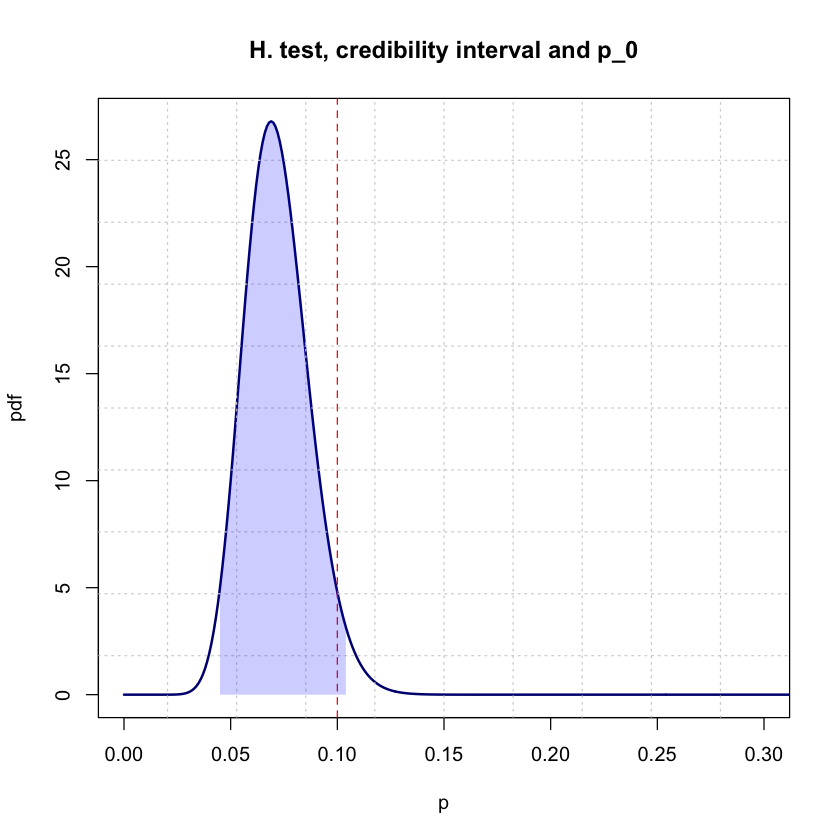

In [71]:
# hypotesis test 
binom.test(x=new_y, n=new_n, p=0.1)
cat('-----------------------------------------\n')
cat('FREQ: p-value > alpha, H_0 is accepted\n')
cat('-----------------------------------------\n')
cat('BAY: p=0.1  in acceptancies area, H_0 is accepted')

plot(p, post,
     xlim = c(0,0.3),
     type = 'l',
     lwd = 2,
     col = 'navy', 
     main = 'H. test, credibility interval and p_0',,
     ylab = 'pdf')


grid(nx = 10, ny = 10 )
abline(v = 0.1, col = 'red', lty = 2)
polygon(x = c(p[p >= lower_bound & p <= upper_bound], rev(p[p >= lower_bound & p <= upper_bound])), # 
        y = c(post[p >= lower_bound & p <= upper_bound], rep(0, length(post[p >= lower_bound & p <= upper_bound]))), 
        col = rgb(0, 0, 1, 0.2), border = NA)



# Ex 4

analyze the data of Exercise 3 and solve points (b) and (c) using a Markov Chain Monte Carlo using stan.

Warning message in readLines(file, warn = TRUE):
"riga finale incompleta in '/Users/giacomo/Desktop/git/POD/Advanced_Statistics_For_Physics_Analysis_24/Rlab06/binom_beta.stan'"



SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 1001 / 10000 [ 10%]  (Sampling)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Sampling)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Sampling)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Sampling)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.01 seconds (Warm-up)
Chain 1:                0.081 seconds (Sampling)
Chain 1:  

Inference for Stan model: anon_model.
3 chains, each with iter=10000; warmup=1000; thin=1; 
post-warmup draws per chain=9000, total post-warmup draws=27000.

         mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
prior    0.09    0.00 0.03   0.05   0.08   0.09   0.11   0.15  9942    1
p_post   0.09    0.00 0.03   0.05   0.08   0.09   0.11   0.15 27175    1
lp__   -40.23    0.01 0.72 -42.27 -40.40 -39.95 -39.78 -39.73 10618    1

Samples were drawn using NUTS(diag_e) at Fri Jun  7 16:16:32 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

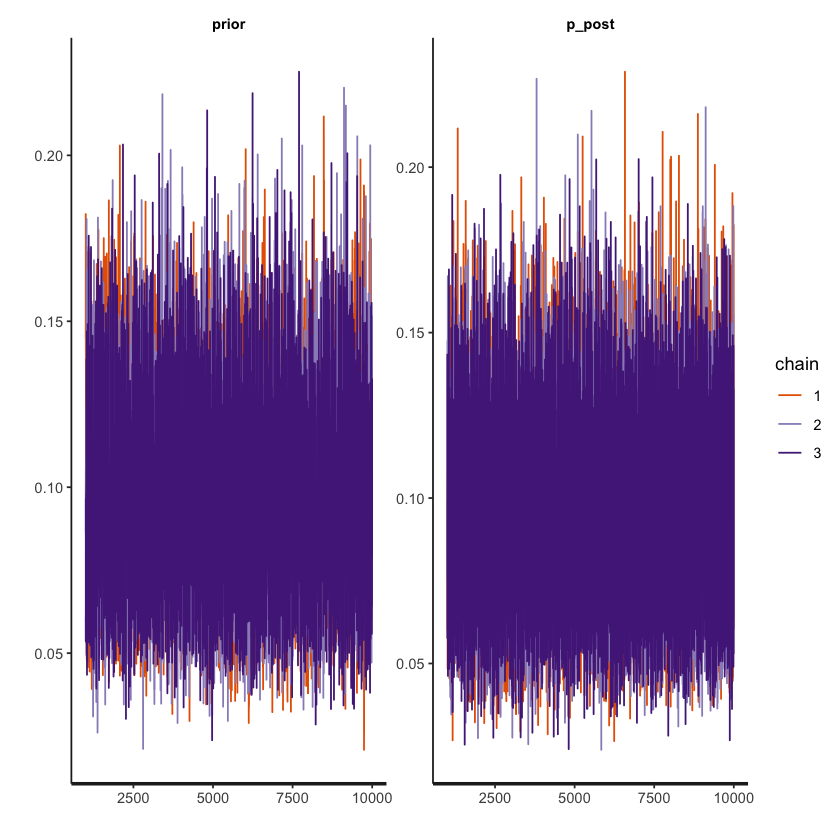

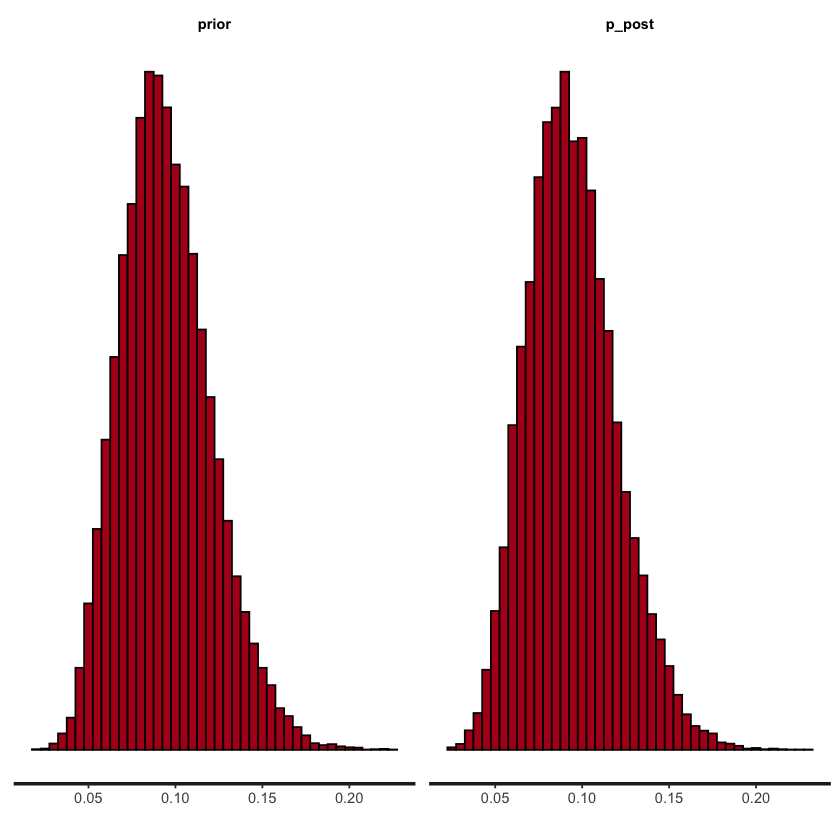

In [72]:
N <- 116
y <- 11

# Data list for Stan
data_list <- list(N = N, y = y)

model <- stan_model("binom_beta.stan")

stanFit <- sampling(object = model,
                    data = data_list, 
                    chains = 3, 
                    iter = 10000, 
                    warmup = 1000, 
                    thin = 1)
stanFit

stan_trace(stanFit)   
stan_hist(stanFit, binwidth = 0.005 )    